In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pylab as plt
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TF version: 2.2.0
Hub version: 0.8.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [3]:
url = '/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011'
PATH = os.path.join(os.path.dirname(url), 'CUB_200_2011')
print(PATH)

/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011


In [4]:
data_dir = os.path.join((PATH), 'smaller_dataset')
print(data_dir)

/content/drive/My Drive/all_bird_data/unzipped_CUB_200_2011/CUB_200_2011/smaller_dataset


In [5]:
batch_size = 5
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
image_generator = ImageDataGenerator(rescale=1./255)

data_gen = image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=data_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 11738 images belonging to 204 classes.


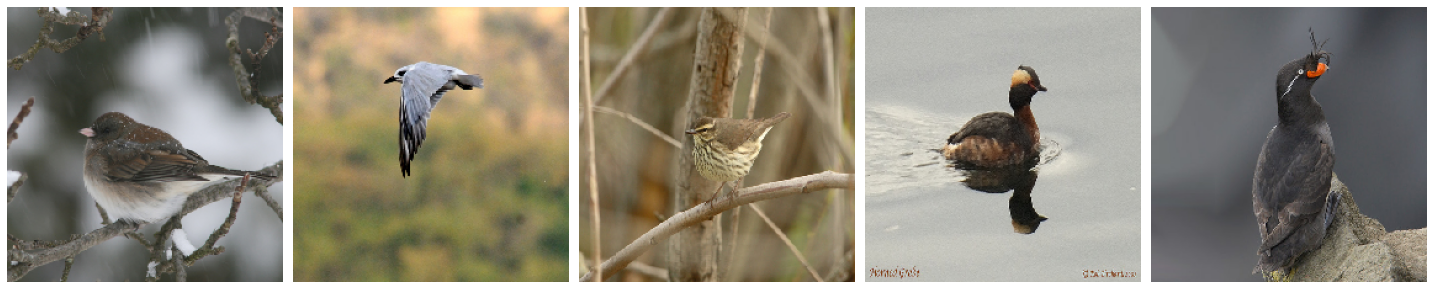

In [7]:
sample_data, _ = next(data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_data[:5])

In [8]:
model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    Flatten(),
    Dense(264, activation='relu'),
    tf.keras.layers.Softmax(axis=1),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [9]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    data_gen,
    steps_per_epoch=50,
    batch_size=5,
    epochs=15,
)

Epoch 1/15
50/50 [==============================] - 197s 4s/step - loss: -16.8547 - accuracy: 0.0120
Epoch 2/15
43/50 [========================>.....] - ETA: 26s - loss: -28.6834 - accuracy: 0.0140

KeyboardInterrupt: ignored